In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [3]:
df = pd.read_csv('./data/sample_positive_emotion.csv')
df

,ad,pos_emo,lemmatized
0,see why everyone is celebrating at hoblit dodg...,1,see why everyone be celebrate at hoblit dodge ...
1,help give people without a home a chance to le...,0,help give people without a home a chance to le...
2,i am so proud of what this grassroots team has...,1,I be so proud of what this grassroot team have...
3,we have until march st to raise money for our ...,0,we have until march st to raise money for our ...
4,learn how to use the new staffing law to impro...,0,learn how to use the new staffing law to impro...
...,...,...,...
145,let us build cameroon wake up cameroonians and...,0,let we build cameroon wake up cameroonian and ...
146,studies show that of all children possess crea...,1,study show that of all child possess creative ...
147,if you are a developer who wants to make a dif...,1,if you be a developer who want to make a diffe...
148,learn the greatest tips tricks from the world ...,1,learn the great tip trick from the world be mo...


In [3]:
# creating prediction model

# creating the filters 
filters =  ['delighted', 'ecstatic', 'freedom', 'relaxed', 'assured', 'happy', 'healthy',
                 'fulfilled', 'genuine', 'authentic', 'secure', 'stable', 'honest', 'truthful','supportive', 'excellent',
                'blissful', 'joyous', 'delighted', 'overjoyed', 'gleeful', 'thankful', 'festive', 'ecstatic', 'satisfied', 
                'cheerful','sunny', 'elated', 'jubilant', 'jovial', 'fun-loving', 'lighthearted', 'glorious', 'innocent', 
                'child-like', 'gratified', 'euphoric', 'playful', 'courageous', 'energetic', 'liberated', 'optimistic', 
                'animated', 'spirited','thrilled', 'wonderful', 'funny', 'exhilarated','youthful', 
                'tickled', 'creative', 'constructive', 'comfortable', 'pleased', 'encouraged', 'surprised', 
                'content', 'serene', 'bright', 'blessed', 'vibrant', 'glowing','relaxing','pleasing',
                'fulfilling','good quality','compassion','glad','appreciative', 'joyful', 'pleased', 
                'confident', 'cheery', 'polite', 'chilly','glory','brave', 'heroic', 'enthusiastic', 
                'passionate','optimistic','delighted', 'excited', 'amazing','amusing','innovative', 'artistic',
                'authentic' 'supportive', 'excellent','blissful', 'joyous', 'delighted', 'overjoyed', 'gleeful', 'thankful']


def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.713
                     precision    recall  f1-score   support

no positive emotion       0.80      0.83      0.82       115
   positive emotion       0.37      0.31      0.34        35

           accuracy                           0.71       150
          macro avg       0.58      0.57      0.58       150
       weighted avg       0.70      0.71      0.71       150

confusion matrix:
[[96 19]
 [24 11]]



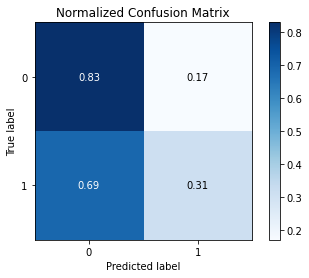

In [5]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['pos_emo'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['pos_emo'], y_pred, target_names=['no positive emotion', 'positive emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['pos_emo'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['pos_emo'], y_pred, normalize=True)
plt.show()